In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [2]:
label = pd.read_csv('Compiled_data_Manual.csv')

In [3]:
label['music_genre'].unique()

array(['Blues', 'Metal', 'Country Music', 'Hip-Hop/Rap', 'EDM'],
      dtype=object)

In [4]:
class_group = label.groupby('music_genre').apply(lambda x: len(x))
class_group

music_genre
Blues            31
Country Music    24
EDM              10
Hip-Hop/Rap      15
Metal             9
dtype: int64

<AxesSubplot:xlabel='music_genre'>

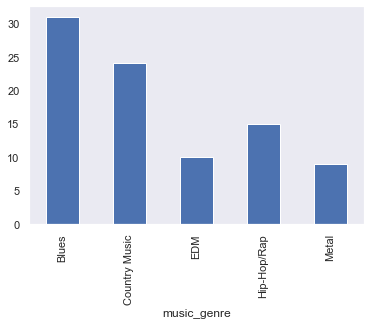

In [5]:
class_group.plot(kind='bar', grid=False)

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer

cols_to_retain = ['scene', 'dom_color', 'rainy_clear', 'day_night', 'waterbody']

X_feature = label[cols_to_retain]
X_dict = X_feature.T.to_dict().values()

vect = DictVectorizer(sparse=False)
X_vector = vect.fit_transform(X_dict)
X_Train = X_vector[:-1]
X_Test = X_vector[-1:] 

le = LabelEncoder()
y_train = le.fit_transform(label['music_genre'][:-1])

In [7]:
print(X_dict)

dict_values([{'scene': 'Mountain', 'dom_color': 'R', 'rainy_clear': 'Rainy', 'day_night': 'Day', 'waterbody': 'No'}, {'scene': 'Forest', 'dom_color': 'G', 'rainy_clear': 'Clear', 'day_night': 'Night', 'waterbody': 'No'}, {'scene': 'Forest', 'dom_color': 'B', 'rainy_clear': 'Clear', 'day_night': 'Day', 'waterbody': 'Yes'}, {'scene': 'Building', 'dom_color': 'G', 'rainy_clear': 'Clear', 'day_night': 'Day', 'waterbody': 'No'}, {'scene': 'Building', 'dom_color': 'B', 'rainy_clear': 'Clear', 'day_night': 'Day', 'waterbody': 'No'}, {'scene': 'Building', 'dom_color': 'B', 'rainy_clear': 'Clear', 'day_night': 'Night', 'waterbody': 'No'}, {'scene': 'Park', 'dom_color': 'R', 'rainy_clear': 'Clear', 'day_night': 'Night', 'waterbody': 'Yes'}, {'scene': 'Building', 'dom_color': 'R', 'rainy_clear': 'Clear', 'day_night': 'Night', 'waterbody': 'Yes'}, {'scene': 'Mountain', 'dom_color': 'B', 'rainy_clear': 'Clear', 'day_night': 'Night', 'waterbody': 'No'}, {'scene': 'Mountain', 'dom_color': 'R', 'rainy

In [7]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_Train,y_train)

In [8]:
le.inverse_transform(clf.predict(X_Test))

array(['Metal'], dtype=object)

In [9]:
Train_predict = clf.predict(X_Train)

In [10]:
(Train_predict == y_train).all()

False

In [11]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy is:', accuracy_score(y_train, Train_predict))
print(classification_report(y_train, Train_predict))

Accuracy is: 0.9886363636363636
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        24
           2       0.91      1.00      0.95        10
           3       1.00      0.93      0.97        15
           4       1.00      1.00      1.00         9

    accuracy                           0.99        88
   macro avg       0.98      0.99      0.98        88
weighted avg       0.99      0.99      0.99        88



In [13]:
dict = {'scene': 'Mountain', 'dom_color': 'R', 'rainy_clear': 'Rainy', 'day_night': 'Day', 'waterbody': 'No'}
le_vect = DictVectorizer(sparse=False)
le_vector = le_vect.fit_transform(dict)
print(le_vector[0])
print(X_vector[0])

[1. 1. 1. 1. 1.]
[1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0.]


In [14]:
vect.get_feature_names()

['day_night=Day',
 'day_night=Night',
 'dom_color=B',
 'dom_color=G',
 'dom_color=R',
 'rainy_clear=Clear',
 'rainy_clear=Rainy',
 'scene=Beach',
 'scene=Building',
 'scene=Forest',
 'scene=Mountain',
 'scene=Park',
 'waterbody=No',
 'waterbody=Yes']

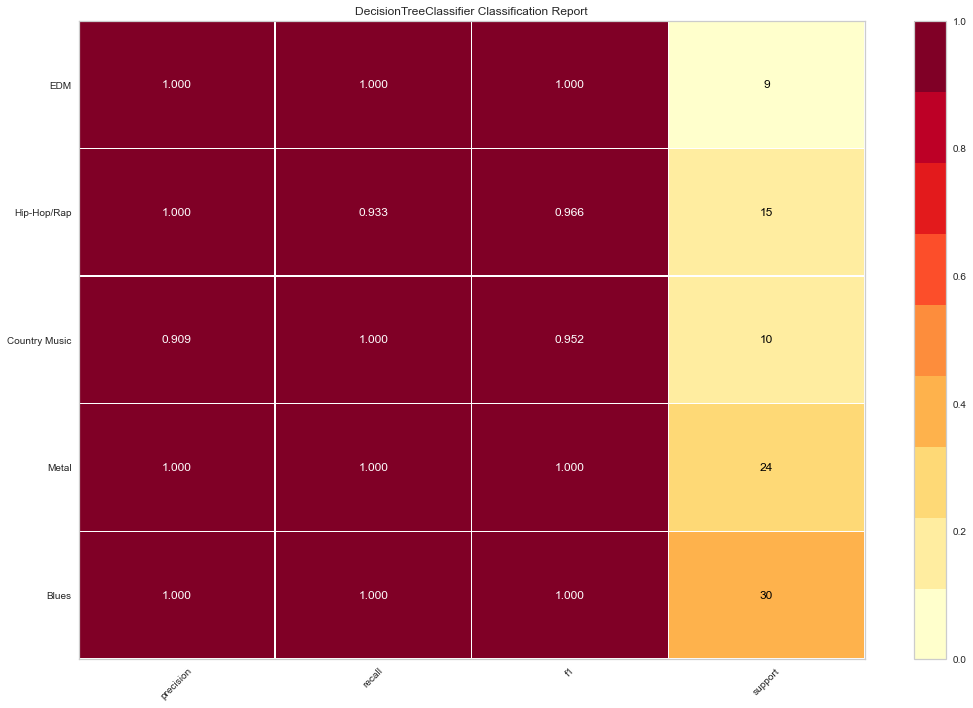

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [18]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
classes = ['Blues', 'Metal', 'Country Music', 'Hip-Hop/Rap', 'EDM']
visualizer = ClassificationReport(clf, classes=classes, support=True, size=(1080, 720))
visualizer.fit(X_Train, y_train)        # Fit the visualizer and the model
visualizer.score(X_Train, y_train)        # Evaluate the model on the test data
visualizer.show()
